In [78]:
#This program is to manually calculate a linear regression line

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import random
from matplotlib import style

style.use('fivethirtyeight')


In [80]:
def create_dataset(num_vars, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(num_vars):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if(correlation and correlation == 'pos'):
            val+= step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

In [93]:
xs, ys = create_dataset(40,10, 2, correlation = 'pos')

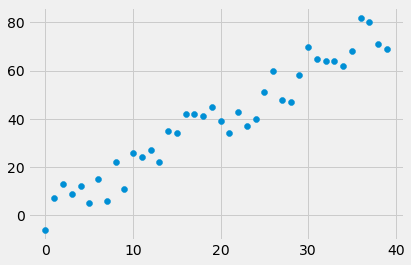

In [94]:
#dtype is necessary for linear regression later
#This is a standard array, but commented out to use the create_dataset fn
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

#show random variables
plt.scatter(xs,ys)
plt.show()

In [95]:
#Get equation for best fit slope
def best_fit_slope(xs,ys):
    m = (
          (mean(xs) * mean(ys) - mean(xs * ys) ) / 
          (mean(xs) ** 2 - mean(xs ** 2))
        )
    return m

In [96]:
m = best_fit_slope(xs,ys)
print(m)

1.9153846153846148


In [97]:
#get equation for y-intercept
def y_intercept(xs,ys,m):
    b = mean(ys) - m * mean(xs)
    return b

In [98]:
b = y_intercept(xs,ys,m)
print(b)

2.250000000000014


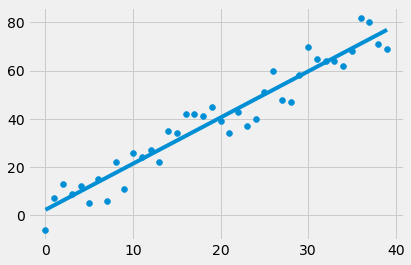

In [99]:
#Create the line of best fit
regression_line = [( m * x) + b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

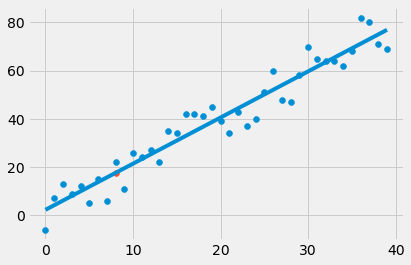

In [100]:
#Predict a new value
predict_x = 8
predict_y = (m * predict_x) + b
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y)

plt.plot(xs, regression_line)
plt.show()

In [101]:
###
#Predict r squared

In [102]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) **2)

In [103]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - squared_error_regr / squared_error_y_mean

In [104]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.930813683546028
